In this competition, one has to use the knowledge of machine learning, deep learning, and model building to predict the price per person for your next workstation trip.
The data has more than 18000+ rows of different packages with the details like
start location, hotel type, cost per person, destination, Itinerary, and many more


In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option("display.max_columns",100)

In [24]:
#/content/Train.csv
train=pd.read_csv("/content/Train.csv")
#/content/Test.csv
test=pd.read_csv("/content/Test.csv")
train.head(1)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0


In [25]:
## Combine the data(train and test)
combined=pd.concat([train,test],ignore_index=True)
train.shape,test.shape,combined.shape

((21000, 15), (9000, 14), (30000, 15))

In [26]:
combined.columns

Index(['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules', 'Per Person Price'],
      dtype='object')

<Axes: xlabel='Per Person Price', ylabel='Density'>

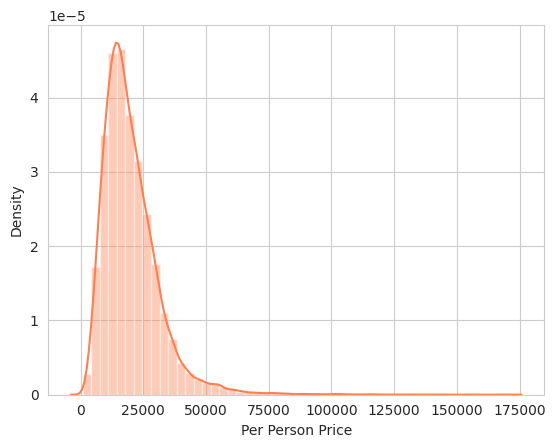

In [27]:
## Lets check the target variable
sns.distplot(combined["Per Person Price"],color="coral")

In [28]:
combined["Places Covered"].unique()

array(['New Delhi|Shimla|Manali|Chandigarh', 'Srinagar|Pahalgam|Srinagar',
       'Udaipur|Chittorgarh',
       'Munnar|Kumarakom|Allepey|Kovalam and Poovar', 'Pattaya|Bangkok',
       'Cochin', 'Jaipur', 'Kasol|Manali',
       'Srinagar|Gulmarg|Pahalgam|Srinagar', 'Udaipur',
       'Kovalam and Poovar|Kanyakumari',
       'Cochin|Munnar|Allepey|Kovalam and Poovar', 'Guwahati',
       'Udaipur|Mount Abu', 'Chandigarh|Shimla|Manali|Chandigarh',
       'Nainital|Kausani|Corbett', 'Kodaikanal',
       'Srinagar|Gulmarg|Srinagar', 'Shimla|Manali|Dharamshala',
       'Ooty|Kodaikanal', 'Kodaikanal|Ooty|Mysore',
       'New Delhi|Agra|Jaipur', 'Dubai', 'Goa',
       'Gangtok|Pelling|Darjeeling',
       'Shimla|Manali|Dharamshala|Dalhousie|Amritsar',
       'Coorg|Ooty|Bandipur', 'Coorg', 'Munnar|Thekkady|Allepey',
       'Shimla', 'Darjeeling',
       'Cochin|Munnar|Thekkady|Allepey|Kovalam and Poovar',
       'Gangtok|Lachung|Gangtok', 'Srinagar|Gulmarg',
       'Mysore|Ooty|Bangalore', 'Ka

In [29]:
len(combined["Places Covered"][0].split("|"))

4

In [30]:
##Count of places visited

places=[]
for i in combined["Places Covered"]:
  places.append(len(i.split("|")))

In [31]:
combined["Count_Places"]=pd.Series(places)

In [32]:
sights=[]
for i in combined["Sightseeing Places Covered"]:
  sights.append(len(i.split("|")))

In [33]:
combined["Count_SS"]=pd.Series(sights)

In [36]:
flights=[]
for i in combined["Airline"]:
  flights.append(len(i.split("|")))

In [37]:
combined['Count_Flights']=pd.Series(flights)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Count_Places,Count_SS,Count_Flights
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,4,1,1
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,3,7,2
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5,2,8,1
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0,4,9,1
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0,2,2,2


In [43]:
## Travel Date
combined['Travel Date']=pd.to_datetime(combined["Travel Date"])

In [45]:
## Extract the Date,Month,Year
combined["Date"]=combined["Travel Date"].dt.day
combined["Month"]=combined["Travel Date"].dt.month
combined["Year"]=combined["Travel Date"].dt.year

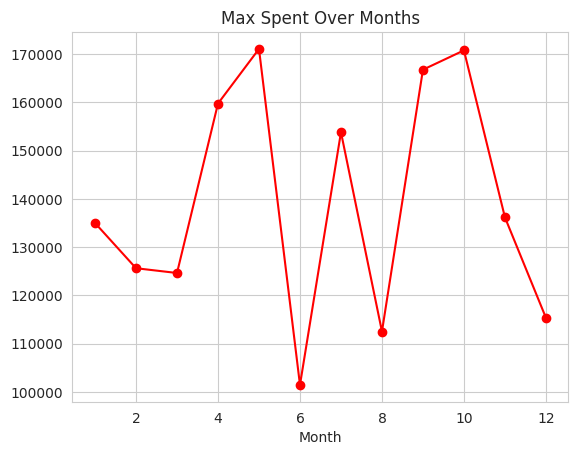

In [51]:
# Extract the pattern with the target variable
max_month=combined.groupby("Month")["Per Person Price"].max()
max_month.plot(kind="line",marker="o",color='red')
plt.title("Max Spent Over Months")
plt.show() ##[4,5,7,9,10]

In [54]:
peak=[4,5,7,9,10]
def peaks(x):
  if x in peak:
    return("Peak_Month")
  else:
    return("Lean_Month")

In [55]:
combined['Peak_Months']=combined["Month"].apply(peaks)

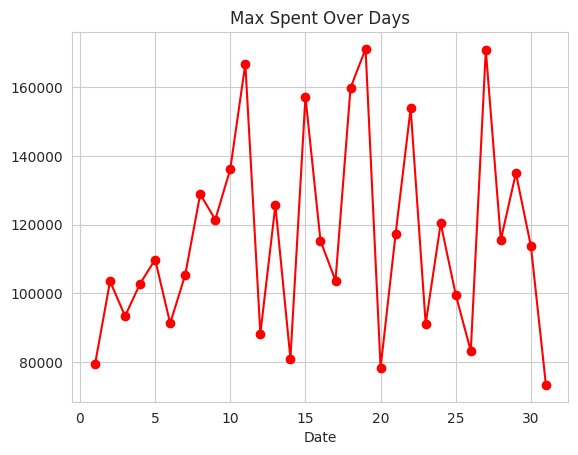

In [64]:
max_days=combined.groupby("Date")["Per Person Price"].max()
max_days.plot(kind="line",marker="o",color='red')
plt.title("Max Spent Over Days")
plt.show() ##[4,5,7,9,10]

In [66]:
peak_days=[2,4,5,7,8,10,11,13,15,18,19,21,22,24,27,29]
combined["Peak_Days"]=combined.Date.apply(lambda x:'Peak_Days' if x in peak_days else 'Lean_Days')

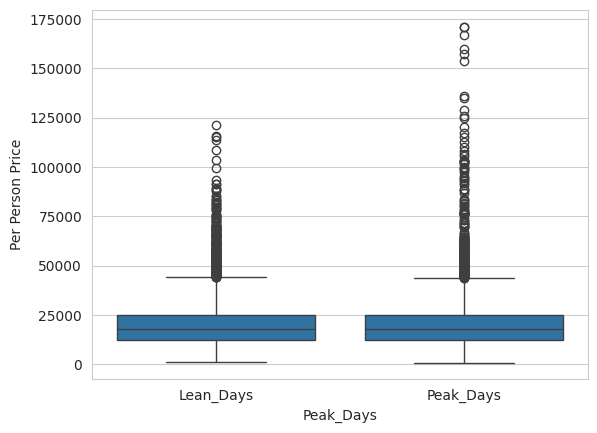

In [70]:
sns.boxplot(x="Peak_Days",y="Per Person Price",data=combined)
plt.show()

In [71]:
combined.head(2)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Count_Places,Count_SS,Count_Flights,Date,Month,Year,Peak_Months,Peak_Days
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,2021-07-30,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,4,1,1,30,7,2021,Peak_Month,Lean_Days
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,2021-12-08,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,3,7,2,8,12,2021,Lean_Month,Peak_Days


In [75]:
import re
combined["Duration"]=combined['Itinerary'].apply(lambda x:np.sum(pd.to_numeric(re.findall('\d',x))))

In [77]:
combined.head(2)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Count_Places,Count_SS,Count_Flights,Date,Month,Year,Peak_Months,Peak_Days,Duration
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,2021-07-30,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,4,1,1,30,7,2021,Peak_Month,Lean_Days,6
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,2021-12-08,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,3,7,2,8,12,2021,Lean_Month,Peak_Days,4


In [80]:
combined["Ratings"]=combined['Hotel Details'].apply(lambda x:np.mean(pd.to_numeric(re.findall('\d\.\d',x))))

In [83]:
combined.head(2)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Count_Places,Count_SS,Count_Flights,Date,Month,Year,Peak_Months,Peak_Days,Duration,Ratings
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,2021-07-30,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,4,1,1,30,7,2021,Peak_Month,Lean_Days,6,4.100000
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,2021-12-08,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,3,7,2,8,12,2021,Lean_Month,Peak_Days,4,4.433333


In [82]:
combined.Ratings.fillna(combined.Ratings.median(),inplace=True)

In [88]:
newdata=combined.drop(["Uniq Id","Destination","Itinerary","Places Covered","Travel Date","Hotel Details","Airline","Sightseeing Places Covered","Cancellation Rules","Date","Month"],axis=1)

In [90]:
newdata.groupby("Package Type")["Per Person Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Package Type,,,,,,,,
Budget,466.0,14151.447425,8236.467588,1757.0,8901.250,13114.25,17927.00,64008.5
Deluxe,6006.0,18409.508825,10228.326587,1198.0,12119.000,16426.75,22774.25,171062.5
Luxury,3278.0,23679.556437,11958.923869,2963.0,15471.625,22222.50,29170.75,107850.0
Premium,5581.0,23965.407006,13272.618593,2967.0,15232.000,21767.50,29188.00,170763.0
Standard,5669.0,16354.089081,9363.498521,791.0,10563.500,14729.50,19972.00,153795.0


In [91]:
package={"Budget":1,"Deluxe":5,"Luxury":2,"Premium":4,"Standard":3}
newdata['Package Type']=newdata['Package Type'].map(package)

In [92]:
newdata.head(2)

,Package Name,Package Type,Start City,Flight Stops,Meals,Per Person Price,Count_Places,Count_SS,Count_Flights,Year,Peak_Months,Peak_Days,Duration,Ratings
0,Best of Shimla and Manali Holiday from Delhi,3,Mumbai,2,3,11509.0,4,1,1,2021,Peak_Month,Lean_Days,6,4.100000
1,Kashmir Valley vacation,4,New Delhi,0,5,22485.5,3,7,2,2021,Lean_Month,Peak_Days,4,4.433333


In [98]:
newdata["PkgType_Duration_Count"]=newdata.groupby("Package Type")["Duration"].transform("count")
newdata["PkgType_Duration_Mean"]=newdata.groupby("Package Type")["Duration"].transform("mean")
newdata["PkgType_Duration_Std"]=newdata.groupby("Package Type")["Duration"].transform("std")

In [102]:
newdata["PkgName_Duration_Count"]=newdata.groupby("Package Name")["Duration"].transform("count")

In [103]:
newdata.drop(['Package Name','Package Type','Start City'],axis=1,inplace=True)

In [104]:
newdata.head()

,Flight Stops,Meals,Per Person Price,Count_Places,Count_SS,Count_Flights,Year,Peak_Months,Peak_Days,Duration,Ratings,PkgType_Duration_Count,PkgType_Duration_Mean,PkgType_Duration_Std,PkgName_Duration_Count
0,2,3,11509.0,4,1,1,2021,Peak_Month,Lean_Days,6,4.100000,8171,4.759148,1.806489,22
1,0,5,22485.5,3,7,2,2021,Lean_Month,Peak_Days,4,4.433333,7960,4.765829,1.821384,11
2,0,4,12421.5,2,8,1,2021,Peak_Month,Lean_Days,3,4.400000,4688,4.663183,1.792593,29
3,0,5,35967.0,4,9,1,2021,Lean_Month,Peak_Days,6,4.500000,7960,4.765829,1.821384,23
4,0,5,25584.0,2,2,2,2021,Lean_Month,Lean_Days,7,4.350000,7960,4.765829,1.821384,20


In [105]:
newdata['Year']=newdata.Year.astype('object')

In [112]:
## Categorical Encoding
dummydata=pd.get_dummies(newdata,drop_first=True,dtype='int64')
dummydata.head()
## Split the data in train and test
newtrain=dummydata.loc[0:train.shape[0]-1,:]
newtest=dummydata.loc[train.shape[0]:,:]
train.shape,test.shape,newtrain.shape,newtest.shape

((21000, 15), (9000, 14), (21000, 15), (9000, 15))

In [111]:
dummydata

,Flight Stops,Meals,Per Person Price,Count_Places,Count_SS,Count_Flights,Duration,Ratings,PkgType_Duration_Count,PkgType_Duration_Mean,PkgType_Duration_Std,PkgName_Duration_Count,Year_2022,Peak_Months_Peak_Month,Peak_Days_Peak_Days
0,2,3,11509.0,4,1,1,6,4.100000,8171,4.759148,1.806489,22,0,1,0
1,0,5,22485.5,3,7,2,4,4.433333,7960,4.765829,1.821384,11,0,0,1
2,0,4,12421.5,2,8,1,3,4.400000,4688,4.663183,1.792593,29,0,1,0
3,0,5,35967.0,4,9,1,6,4.500000,7960,4.765829,1.821384,23,0,0,1
4,0,5,25584.0,2,2,2,7,4.350000,7960,4.765829,1.821384,20,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2,3,NaN,3,10,1,4,4.100000,8171,4.759148,1.806489,13,0,0,1
29996,1,3,NaN,4,12,1,4,4.100000,8499,4.777974,1.749896,32,0,0,1
29997,0,4,NaN,2,12,1,5,4.250000,4688,4.663183,1.792593,11,0,0,1
29998,1,3,NaN,4,11,2,7,4.125000,8499,4.777974,1.749896,20,0,0,1


In [113]:
## Dropping the target variable var from newtest
newtest.drop("Per Person Price",axis=1,inplace=True)

In [115]:
newtest.head()

,Flight Stops,Meals,Count_Places,Count_SS,Count_Flights,Duration,Ratings,PkgType_Duration_Count,PkgType_Duration_Mean,PkgType_Duration_Std,PkgName_Duration_Count,Year_2022,Peak_Months_Peak_Month,Peak_Days_Peak_Days
21000,0,4,1,1,1,5,4.10,4688,4.663183,1.792593,24,0,1,1
21001,0,4,1,1,1,2,4.40,4688,4.663183,1.792593,11,0,0,0
21002,2,3,1,4,1,3,4.10,8171,4.759148,1.806489,15,1,0,0
21003,1,3,1,6,1,3,4.10,8499,4.777974,1.749896,22,0,1,0
21004,0,4,4,10,1,5,4.55,4688,4.663183,1.792593,15,0,1,1


In [117]:
from sklearn.ensemble import GradientBoostingRegressor
x=newtrain.drop("Per Person Price",axis=1)
y=newtrain["Per Person Price"]
gbm=GradientBoostingRegressor()
pred_gbm=gbm.fit(x,y).predict(newtest)

In [119]:
submission=pd.DataFrame({'Per Person Price':pred_gbm})
submission.to_csv("GBM.csv",index=False)